In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)

In [3]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress

In [4]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

<h1>11. 01. 2025.</h1>

<h2>Tracking on Bz vs. simulated velocities at different $\tau$-s</h2>

<h3>$\log\tau=-1$</h3>

In [5]:
Vxm1 = fits.open("Velocities_TAU_0_1.fits")[1].data # Vy from Velocities.fits as originally thought
Vym1 = fits.open("Velocities_TAU_0_1.fits")[0].data # Vx from Velocities.fits as originally thought
#Vxm1 = Vxm1[::3]
#Vym1 = Vym1[::3]
Vxm1 = Vxm1.transpose(0, 2, 1)
Vym1 = Vym1.transpose(0, 2, 1)

In [6]:
Vxm1_mean = temporal_avg(Vxm1, 0, 90)
Vxm1_mean = Vxm1_mean/1E5
Vym1_mean = temporal_avg(Vym1, 0, 90)
Vym1_mean = Vym1_mean/1E5

In [7]:
Vxm1_filtered600 = gaussian_filter(Vxm1_mean, 22.5, mode = "wrap")
Vym1_filtered600 = gaussian_filter(Vym1_mean, 22.5, mode = "wrap")

In [8]:
Vx_Bz1 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum1Bz_tracked.fits")[0].data
Vy_Bz1 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum1Bz_tracked.fits")[1].data

In [9]:
Vx_Bz1_mean = temporal_avg(Vx_Bz1, 0, 90)
Vy_Bz1_mean = temporal_avg(Vy_Bz1, 0, 90)

In [10]:
Rxm1_reg = pearsonr((Vxm1[0]/1E5).flatten(), Vx_Bz1[0].flatten())
print(Rxm1_reg)

PearsonRResult(statistic=0.6166480290398004, pvalue=0.0)


In [11]:
Rym1_reg = pearsonr((Vym1[0]/1E5).flatten(), Vy_Bz1[0].flatten())
print(Rym1_reg)

PearsonRResult(statistic=0.5934201654525127, pvalue=0.0)


In [12]:
Rxm1_tav = pearsonr(Vxm1_mean.flatten(), Vx_Bz1_mean.flatten())
print(Rxm1_tav)

PearsonRResult(statistic=0.7824599700859564, pvalue=0.0)


In [13]:
Rym1_tav = pearsonr(Vym1_mean.flatten(), Vy_Bz1_mean.flatten())
print(Rym1_tav)

PearsonRResult(statistic=0.7836429680094132, pvalue=0.0)


In [14]:
Rxm1_fil = pearsonr(Vxm1_filtered600.flatten(), Vx_Bz1_mean.flatten())
print(Rxm1_fil)

PearsonRResult(statistic=0.893612292601921, pvalue=0.0)


In [15]:
Rym1_fil = pearsonr(Vym1_filtered600.flatten(), Vy_Bz1_mean.flatten())
print(Rym1_fil)

PearsonRResult(statistic=0.8979314881131106, pvalue=0.0)


/tmp/ipykernel_53598/3857482211.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_53598/3857482211.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Bz_vs_SIM_logtaum1.png", dpi = 100)
/home/mistflow/anaconda3/envs/flct/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


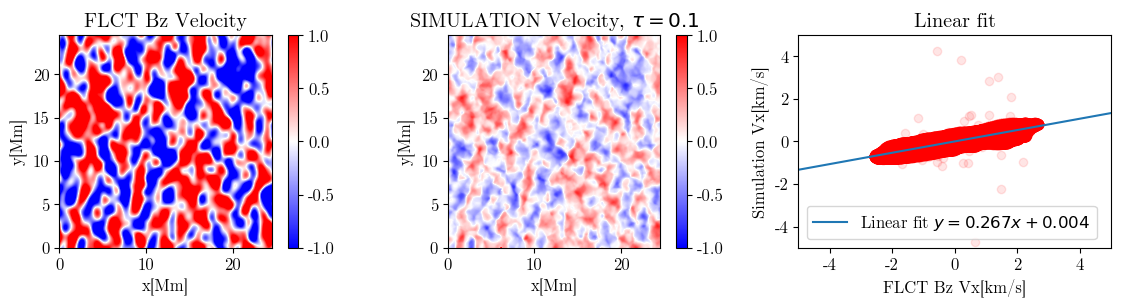

In [16]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("FLCT Bz Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm1_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.1$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Bz1_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(133)
plt.scatter(Vxm1_filtered600[:,:].flatten(), Vx_Bz1_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.xlabel("FLCT Bz Vx[km/s]")
plt.ylabel("Simulation Vx[km/s]")
m, b, *_ = linregress(Vxm1_filtered600.flatten(), Vx_Bz1_mean.flatten())
plt.axline(xy1=(0, b), slope=m, label=f'Linear fit $y = {m:.3f}x {b:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])
fig.tight_layout()
plt.savefig("FLCT_Bz_vs_SIM_logtaum1.png", dpi = 100)

<h3>$\log\tau=-2$</h3>

In [17]:
Vxm2 = fits.open("Velocities_TAU_0_010.fits")[1].data # Vy from Velocities.fits as originally thought
Vym2 = fits.open("Velocities_TAU_0_010.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm2 = Vxm2.transpose(0, 2, 1)
Vym2 = Vym2.transpose(0, 2, 1)

In [18]:
Vxm2_mean = temporal_avg(Vxm2, 0, 90)
Vxm2_mean = Vxm2_mean/1E5
Vym2_mean = temporal_avg(Vym2, 0, 90)
Vym2_mean = Vym2_mean/1E5

In [19]:
Vxm2_filtered600 = gaussian_filter(Vxm2_mean, 22.5, mode = "wrap")
Vym2_filtered600 = gaussian_filter(Vym2_mean, 22.5, mode = "wrap")

In [20]:
Vx_Bz2 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum2Bz_tracked.fits")[0].data
Vy_Bz2 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum2Bz_tracked.fits")[1].data

In [21]:
Vx_Bz2_mean = temporal_avg(Vx_Bz2, 0, 90)
Vy_Bz2_mean = temporal_avg(Vy_Bz2, 0, 90)

In [22]:
Rxm2_reg = pearsonr((Vxm2[0]/1E5).flatten(), Vx_Bz2[0].flatten())
print(Rxm2_reg)

PearsonRResult(statistic=0.5787581814338028, pvalue=0.0)


In [23]:
Rym2_reg = pearsonr((Vym2[0]/1E5).flatten(), Vy_Bz2[0].flatten())
print(Rym2_reg)

PearsonRResult(statistic=0.5801255550168782, pvalue=0.0)


In [24]:
Rxm2_tav = pearsonr(Vxm2_mean.flatten(), Vx_Bz2_mean.flatten())
print(Rxm2_tav)

PearsonRResult(statistic=0.763392700771237, pvalue=0.0)


In [25]:
Rym2_tav = pearsonr(Vym2_mean.flatten(), Vy_Bz2_mean.flatten())
print(Rym2_tav)

PearsonRResult(statistic=0.7589710393883901, pvalue=0.0)


In [26]:
Rxm2_fil = pearsonr(Vxm2_filtered600.flatten(), Vx_Bz2_mean.flatten())
print(Rxm2_fil)

PearsonRResult(statistic=0.8574397977691767, pvalue=0.0)


In [27]:
Rym2_fil = pearsonr(Vym2_filtered600.flatten(), Vy_Bz2_mean.flatten())
print(Rym2_fil)

PearsonRResult(statistic=0.8488358452746069, pvalue=0.0)


/tmp/ipykernel_53598/2915688655.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_53598/2915688655.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Bz_vs_SIM_logtaum2.png", dpi = 100)


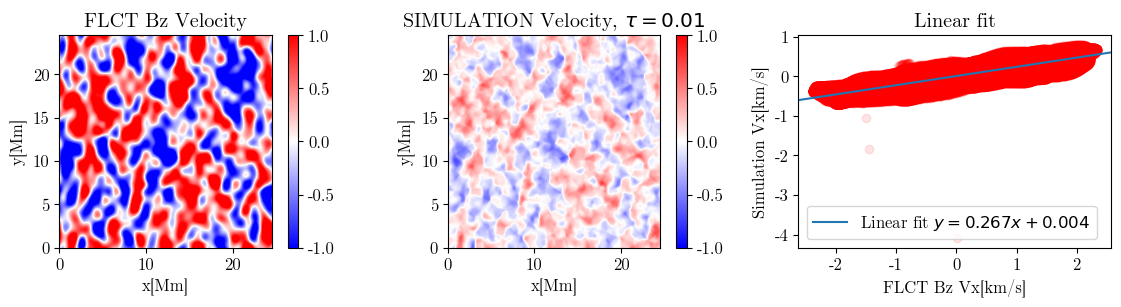

In [28]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("FLCT Bz Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm2_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.01$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Bz2_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(133)
plt.scatter(Vxm2_filtered600[:,:].flatten(), Vx_Bz2_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.xlabel("FLCT Bz Vx[km/s]")
plt.ylabel("Simulation Vx[km/s]")
m2, b2, *_ = linregress(Vxm2_filtered600.flatten(), Vx_Bz2_mean.flatten())
plt.axline(xy1=(0, b2), slope=m2, label=f'Linear fit $y = {m:.3f}x {b:+.3f}$')
plt.legend()
#plt.xlim([-5,5])
#plt.ylim([-5,5])
fig.tight_layout()
plt.savefig("FLCT_Bz_vs_SIM_logtaum2.png", dpi = 100)

<h3>$\log\tau=-3$</h3>

In [29]:
Vxm3 = fits.open("Velocities_TAU_0_001.fits")[1].data # Vy from Velocities.fits as originally thought
Vym3 = fits.open("Velocities_TAU_0_001.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm3 = Vxm3.transpose(0, 2, 1)
Vym3 = Vym3.transpose(0, 2, 1)

In [30]:
Vxm3_mean = temporal_avg(Vxm3, 0, 90)
Vxm3_mean = Vxm3_mean/1E5
Vym3_mean = temporal_avg(Vym3, 0, 90)
Vym3_mean = Vym3_mean/1E5

In [31]:
Vxm3_filtered600 = gaussian_filter(Vxm3_mean, 22.5, mode = "wrap")
Vym3_filtered600 = gaussian_filter(Vym3_mean, 22.5, mode = "wrap")

In [32]:
Vx_Bz3 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum3Bz_tracked.fits")[0].data
Vy_Bz3 = fits.open("pyFLCT_fwhm_600_dt_30_logTaum3Bz_tracked.fits")[1].data

In [33]:
Vx_Bz3_mean = temporal_avg(Vx_Bz3, 0, 90)
Vy_Bz3_mean = temporal_avg(Vy_Bz3, 0, 90)

In [34]:
Rxm3_reg = pearsonr((Vxm3[0]/1E5).flatten(), Vx_Bz3[0].flatten())
print(Rxm3_reg)

PearsonRResult(statistic=0.6069007292463952, pvalue=0.0)


In [35]:
Rym3_reg = pearsonr((Vym3[0]/1E5).flatten(), Vy_Bz3[0].flatten())
print(Rym3_reg)

PearsonRResult(statistic=0.5966030332819795, pvalue=0.0)


In [36]:
Rxm3_tav = pearsonr(Vxm3_mean.flatten(), Vx_Bz3_mean.flatten())
print(Rxm3_tav)

PearsonRResult(statistic=0.7849719369928048, pvalue=0.0)


In [37]:
Rym3_tav = pearsonr(Vym3_mean.flatten(), Vy_Bz3_mean.flatten())
print(Rym3_tav)

PearsonRResult(statistic=0.7492468430448557, pvalue=0.0)


In [38]:
Rxm3_fil = pearsonr(Vxm3_filtered600.flatten(), Vx_Bz3_mean.flatten())
print(Rxm3_fil)

PearsonRResult(statistic=0.8481436129898199, pvalue=0.0)


In [39]:
Rym3_fil = pearsonr(Vym3_filtered600.flatten(), Vy_Bz3_mean.flatten())
print(Rym3_fil)

PearsonRResult(statistic=0.8111730698049616, pvalue=0.0)


/tmp/ipykernel_53598/3372167851.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_53598/3372167851.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Bz_vs_SIM_logtaum3.png", dpi = 100)


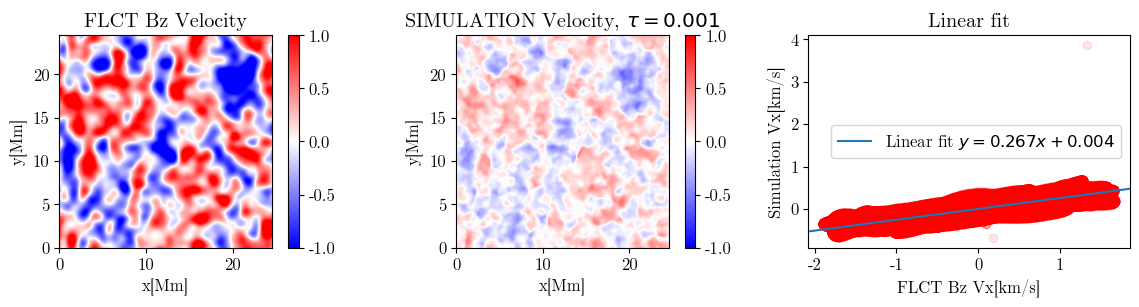

In [40]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("FLCT Bz Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm3_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.001$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Bz3_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(133)
plt.scatter(Vxm3_filtered600[:,:].flatten(), Vx_Bz3_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.xlabel("FLCT Bz Vx[km/s]")
plt.ylabel("Simulation Vx[km/s]")
m3, b3, *_ = linregress(Vxm3_filtered600.flatten(), Vx_Bz3_mean.flatten())
plt.axline(xy1=(0, b3), slope=m3, label=f'Linear fit $y = {m:.3f}x {b:+.3f}$')
plt.legend()
#plt.xlim([-5,5])
#plt.ylim([-5,5])
fig.tight_layout()
plt.savefig("FLCT_Bz_vs_SIM_logtaum3.png", dpi = 100)